# ML EX1

Import some modules

In [138]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Define functions for linear regression

In [139]:
def computeCost(X, y, theta):
    m = y.size
    diff = np.dot(X, theta).reshape(-1) - y
    return np.vdot(diff, diff) / (2 * m)

In [140]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for idx in np.nditer(J_history, op_flags=['readwrite']):
        '''
        Instructions: Perform a single gradient step on the parameter vector
                      theta. 
        
        Hint: While debugging, it can be useful to print out the values
              of the cost function (computeCost) and gradient here.
        '''
        diff = (np.dot(X, theta).reshape(-1) - y).reshape((m,1))
        theta = theta - (alpha/m) * np.dot(diff.T, X).T
        
        # Save the cost J in every iteration    
        idx = computeCost(X, y, theta)
    
    return theta

Exercise Code

Plotting Data ...


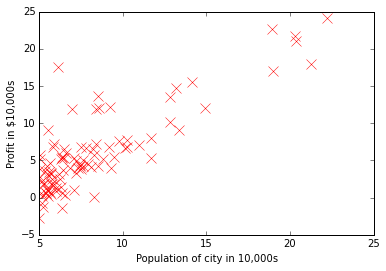

In [141]:
print 'Plotting Data ...'
data = np.loadtxt('datasets/ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]
m = y.size # number of training examples

plt.plot(X, y, 'rx', markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.show()

In [142]:
print 'Running Gradient Descent ...'

X = (np.vstack((np.ones(m), X))).T # add ones, and transpose to (m by 2)
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
print computeCost(X, y, theta)

# run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print 'Theta found by gradient descent: '
print theta[0], theta[1]


Running Gradient Descent ...
32.0727338775
Theta found by gradient descent: 
[-3.63029144] [ 1.16636235]


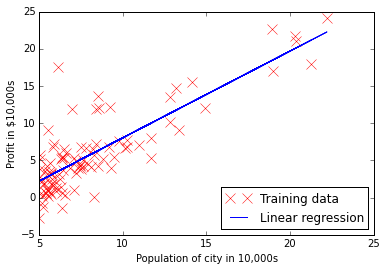

For population = 35,000, we predict a profit of  4519.7678677
For population = 70,000, we predict a profit of  45342.4501294


In [146]:
# Plot the linear fit
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')
plt.plot(X[:,1], y, 'rx', markersize=10, label='Training data')
plt.plot(X[:,1], np.dot(X, theta).reshape(-1), '-', label='Linear regression')
plt.legend(loc='lower right')
plt.show()

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.vdot(np.array([1, 3.5]), theta)
print 'For population = 35,000, we predict a profit of ', predict1*10000
predict2 = np.vdot(np.array([1, 7]), theta)
print 'For population = 70,000, we predict a profit of ', predict2*10000